<ipython-input-4-9429073db826>:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = img.imread('/content/dog.webp')


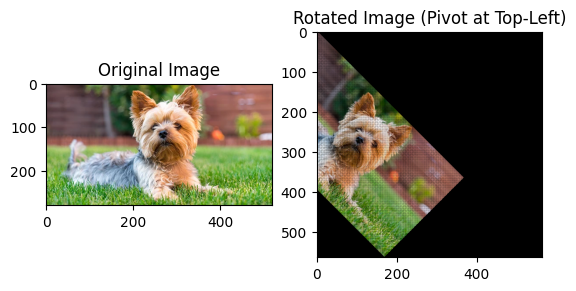

In [4]:
#Rotasi Citra menggunakan pivot di titik (0,0) pojok kiri atas
import imageio as img
import numpy as np
import matplotlib.pyplot as plt

def rotateImage(image, degree):
    radian_deg = np.radians(degree)
    cos_deg, sin_deg = np.cos(radian_deg), np.sin(radian_deg)

    height, width = image.shape[:2]
    max_dim_y = int(abs(height * cos_deg) + abs(width * sin_deg))
    max_dim_x = int(abs(width * cos_deg) + abs(height * sin_deg))
    outputImage = np.zeros((max_dim_y, max_dim_x, 3), dtype=image.dtype)

    for y in range(height):
        for x in range(width):
            # Hitung posisi baru dengan pivot di titik (0, 0)
            newX = int(cos_deg * x - sin_deg * y)
            newY = int(sin_deg * x + cos_deg * y)

            # Pastikan posisi baru berada dalam batas gambar output
            if 0 <= newX < max_dim_x and 0 <= newY < max_dim_y:
                outputImage[newY, newX] = image[y, x]

    return outputImage

image = img.imread('/content/dog.webp')

rotated_image = rotateImage(image, 45)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(rotated_image)
plt.title("Rotated Image (Pivot at Top-Left)")

plt.show()